## Imports and Settings

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import os

SEED = 321
np.random.seed(SEED)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
sns.set_context('talk', font_scale=0.9)

## Define Format Date Function

In [5]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

## Import Data as DF

In [8]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRtZ3XGbdzViSOsO6Gam4LQAQTSrFMXSAz_CIcBmmQYBv9uuggbGcxUuqXtMeUPiHR9NyI6At3apf5d/pub?output=csv'

df = pd.read_csv(url)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 897 entries, Province/State to 7/2/22
dtypes: float64(2), int64(893), object(2)
memory usage: 2.0+ MB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22,6/29/22,6/30/22,7/1/22,7/2/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181987,182033,182072,182149,182228,182324,182403,182528,182594,182643
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,278211,278504,278793,279077,279077,279167,280298,280851,281470,282141
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266015,266025,266030,266038,266049,266062,266073,266087,266105,266115
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43774,43774,43774,43774,43774,43774,43774,43774,44177,44177
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,101320,101320,101320,101320,101320


In [9]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/23/22', '6/24/22', '6/25/22', '6/26/22', '6/27/22', '6/28/22',
       '6/29/22', '6/30/22', '7/1/22', '7/2/22'],
      dtype='object', length=897)

## Melting Wide Form Data

In [11]:
# Using pd.melt to change wide form into long form
melt = pd.melt(df.drop(columns=['Lat','Long']), 
               id_vars=['Province/State', 'Country/Region'],
              value_name='Confirmed',
              var_name='Date')
melt

,Province/State,Country/Region,Date,Confirmed
0,NaN,Afghanistan,1/22/20,0
1,NaN,Albania,1/22/20,0
2,NaN,Algeria,1/22/20,0
3,NaN,Andorra,1/22/20,0
4,NaN,Angola,1/22/20,0
...,...,...,...,...
254500,NaN,West Bank and Gaza,7/2/22,659853
254501,NaN,Winter Olympics 2022,7/2/22,535
254502,NaN,Yemen,7/2/22,11824
254503,NaN,Zambia,7/2/22,325857


In [13]:
melt['Date'] = pd.to_datetime(melt['Date'])
melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254505 entries, 0 to 254504
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  79477 non-null   object        
 1   Country/Region  254505 non-null  object        
 2   Date            254505 non-null  datetime64[ns]
 3   Confirmed       254505 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.8+ MB


In [16]:
melt = melt.set_index('Date')
melt

,Province/State,Country/Region,Confirmed
Date,,,
2020-01-22,NaN,Afghanistan,0
2020-01-22,NaN,Albania,0
2020-01-22,NaN,Algeria,0
2020-01-22,NaN,Andorra,0
2020-01-22,NaN,Angola,0
...,...,...,...
2022-07-02,NaN,West Bank and Gaza,659853
2022-07-02,NaN,Winter Olympics 2022,535
2022-07-02,NaN,Yemen,11824


In [17]:
melt['Country/Region'].nunique()

199

## Grouping Countries Together

In [23]:
ts = melt.groupby('Country/Region').resample('D').first()
ts

Province/State Country/Region  Confirmed
Country/Region Date                                               
Afghanistan    2020-01-22           None    Afghanistan          0
               2020-01-23           None    Afghanistan          0
               2020-01-24           None    Afghanistan          0
               2020-01-25           None    Afghanistan          0
               2020-01-26           None    Afghanistan          0
...                                  ...            ...        ...
Zimbabwe       2022-06-28           None       Zimbabwe     255383
               2022-06-29           None       Zimbabwe     255520
               2022-06-30           None       Zimbabwe     255586
               2022-07-01           None       Zimbabwe     255586
               2022-07-02           None       Zimbabwe     255586

[177707 rows x 3 columns]

## Filtering on Index

In [25]:
ts.loc[pd.IndexSlice[:,'2020'],:]

Province/State Country/Region  Confirmed
Country/Region Date                                               
Afghanistan    2020-01-22           None    Afghanistan          0
               2020-01-23           None    Afghanistan          0
               2020-01-24           None    Afghanistan          0
               2020-01-25           None    Afghanistan          0
               2020-01-26           None    Afghanistan          0
...                                  ...            ...        ...
Zimbabwe       2020-12-27           None       Zimbabwe      13077
               2020-12-28           None       Zimbabwe      13148
               2020-12-29           None       Zimbabwe      13325
               2020-12-30           None       Zimbabwe      13625
               2020-12-31           None       Zimbabwe      13867

[68655 rows x 3 columns]

In [26]:
ts.loc[pd.IndexSlice['Afghanistan':'Algeria','2020'],:]

Province/State Country/Region  Confirmed
Country/Region Date                                               
Afghanistan    2020-01-22           None    Afghanistan          0
               2020-01-23           None    Afghanistan          0
               2020-01-24           None    Afghanistan          0
               2020-01-25           None    Afghanistan          0
               2020-01-26           None    Afghanistan          0
...                                  ...            ...        ...
Algeria        2020-12-27           None        Algeria      98249
               2020-12-28           None        Algeria      98631
               2020-12-29           None        Algeria      98988
               2020-12-30           None        Algeria      99311
               2020-12-31           None        Algeria      99610

[1035 rows x 3 columns]

## Plotting MultiIndex

In [27]:
countries = ['Canada','Mexico','US']
plot = ts.loc[countries].copy()
plot

Province/State Country/Region  Confirmed
Country/Region Date                                               
Canada         2020-01-22        Alberta         Canada          0
               2020-01-23        Alberta         Canada          0
               2020-01-24        Alberta         Canada          0
               2020-01-25        Alberta         Canada          0
               2020-01-26        Alberta         Canada          0
...                                  ...            ...        ...
US             2022-06-28           None             US   87296327
               2022-06-29           None             US   87490815
               2022-06-30           None             US   87627486
               2022-07-01           None             US   87821971
               2022-07-02           None             US   87838623

[2679 rows x 3 columns]

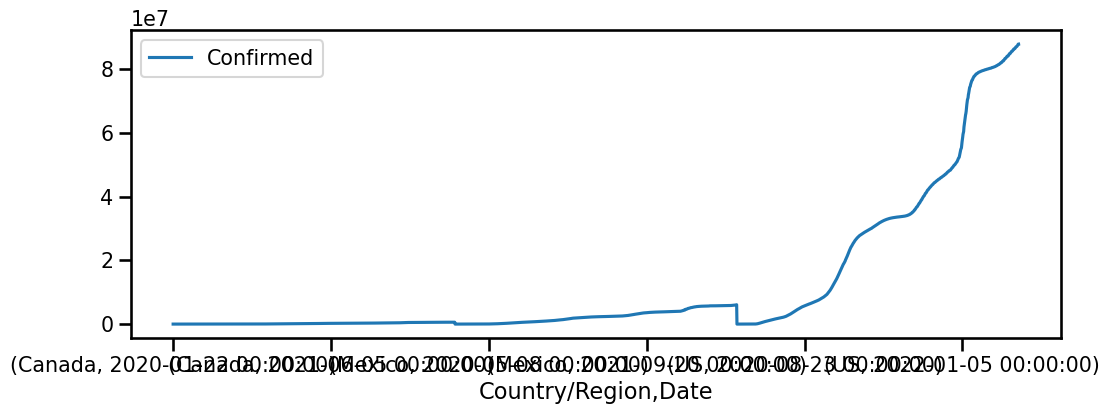

In [28]:
plot.plot();

## Unstacking Index

In [29]:
plot.index.get_level_values(0)

Index(['Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada',
       ...
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US'],
      dtype='object', name='Country/Region', length=2679)

In [30]:
plot.index.get_level_values(1)

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26',
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-02'],
              dtype='datetime64[ns]', name='Date', length=2679, freq=None)

In [31]:
unstack = plot.unstack(level=0)
unstack

Province/State              Country/Region              \
Country/Region         Canada Mexico    US         Canada  Mexico  US   
Date                                                                    
2020-01-22            Alberta   None  None         Canada  Mexico  US   
2020-01-23            Alberta   None  None         Canada  Mexico  US   
2020-01-24            Alberta   None  None         Canada  Mexico  US   
2020-01-25            Alberta   None  None         Canada  Mexico  US   
2020-01-26            Alberta   None  None         Canada  Mexico  US   
...                       ...    ...   ...            ...     ...  ..   
2022-06-28            Alberta   None  None         Canada  Mexico  US   
2022-06-29            Alberta   None  None         Canada  Mexico  US   
2022-06-30            Alberta   None  None         Canada  Mexico  US   
2022-07-01            Alberta   None  None         Canada  Mexico  US   
2022-07-02            Alberta   None  None         Canada  Mexico  US   

               Confirmed                     
Country/Region    Canada   Mexico        US  
Date                                         
2020-01-22             0        0         1  
2020-01-23             0        0         1  
2020-01-24             0        0         2  
2020-01-25             0        0         2  
2020-01-26             0        0         5  
...                  ...      ...       ...  
2022-06-28        587890  5986917  87296327  
2022-06-29        588691  5986917  87490815  
2022-06-30        588691  6034602  87627486  
2022-07-01        588691  6058689  87821971  
2022-07-02        588691  6058689  87838623  

[893 rows x 9 columns]

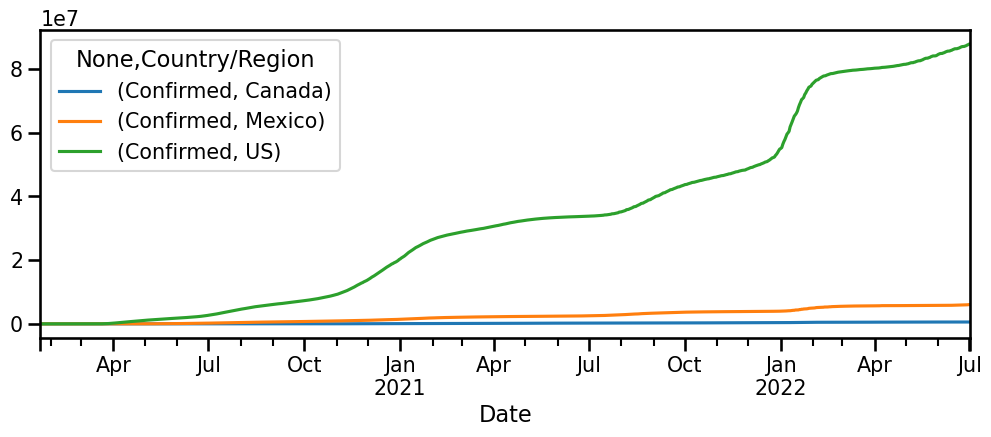

In [33]:
unstack.plot();

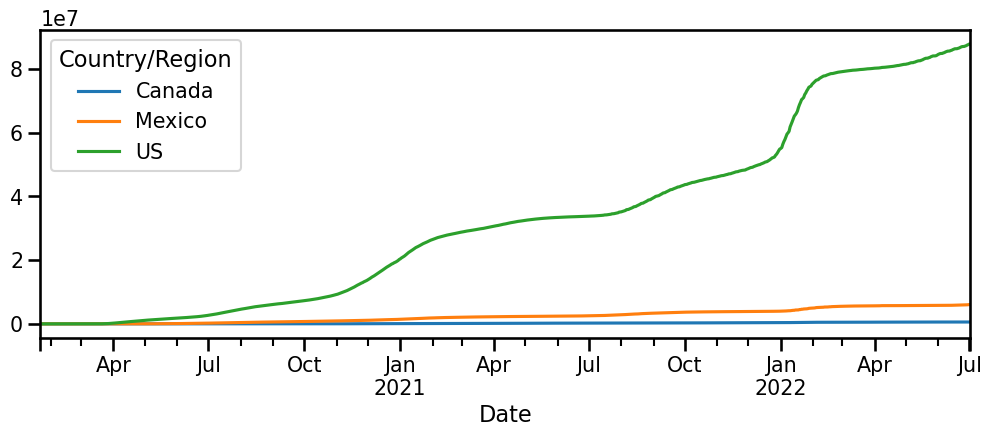

In [35]:
## Fixing issue in legend
unstack['Confirmed'].plot();

## Analyzing 1 Country

In [36]:
us = ts.loc['US','Confirmed']
us.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26',
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-02'],
              dtype='datetime64[ns]', name='Date', length=893, freq='D')

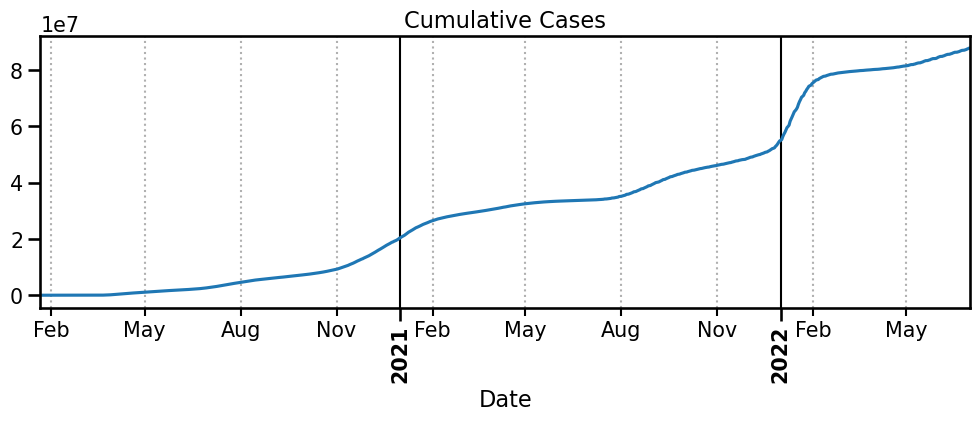

In [37]:
ax = us.plot(style='-',title='Cumulative Cases');
format_xdates(ax);

## Looking at the State Level?

In [38]:
states = melt[melt['Country/Region']== 'US']
states

,Province/State,Country/Region,Confirmed
Date,,,
2020-01-22,NaN,US,1
2020-01-23,NaN,US,1
2020-01-24,NaN,US,2
2020-01-25,NaN,US,2
2020-01-26,NaN,US,5
...,...,...,...
2022-06-28,NaN,US,87296327
2022-06-29,NaN,US,87490815
2022-06-30,NaN,US,87627486


In [40]:
states['Province/State'].unique()

array([nan], dtype=object)